In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score, make_scorer, accuracy_score, log_loss, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,  BatchNormalization,LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Regression - All Games with Ratings

In [121]:
df_reg = pd.read_csv('../data/vectorisation_attempt_2/preprocessed_games_with_rating_reg.csv')
print(df_reg.shape)
df_reg

(17225, 1001)


,id,2d,3d,ability,able,access,account,achievement,achievements,action,...,workshop,world,wrong,www,xbox,year,young,zombie,zombies,zone
0,3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061058,0.000000,...,0.000000,0.126401,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.127915,...,0.000000,0.252331,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030338,0.000000,...,0.074644,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050617,0.000000,...,0.124537,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.251497,...,0.000000,0.049611,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,320395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
17221,311674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031070,0.000000,...,0.000000,0.032160,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
17222,290056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061092,0.000000,...,0.150309,0.063236,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
17223,268298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [122]:
df_reg.describe()

,id,2d,3d,ability,able,access,account,achievement,achievements,action,...,workshop,world,wrong,www,xbox,year,young,zombie,zombies,zone
count,1.722500e+04,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,...,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000
mean,1.321518e+05,0.017081,0.006902,0.015272,0.007484,0.010950,0.005914,0.007894,0.025347,0.025649,...,0.004086,0.043094,0.002596,0.005973,0.003517,0.013005,0.006790,0.006464,0.003649,0.002732
std,2.338804e+05,0.039986,0.029720,0.041728,0.030323,0.033133,0.031976,0.036062,0.030771,0.050547,...,0.023723,0.064168,0.021061,0.033127,0.032286,0.041999,0.033532,0.050056,0.022356,0.024738
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.340700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.136200e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.056700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048850,0.042730,...,0.000000,0.070227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.003458e+06,0.526511,0.337874,0.434847,0.496938,0.511496,0.431529,0.795660,0.277490,1.000000,...,0.471282,0.541075,0.443795,0.506743,0.695579,0.598309,0.513172,0.877616,0.330237,0.813092


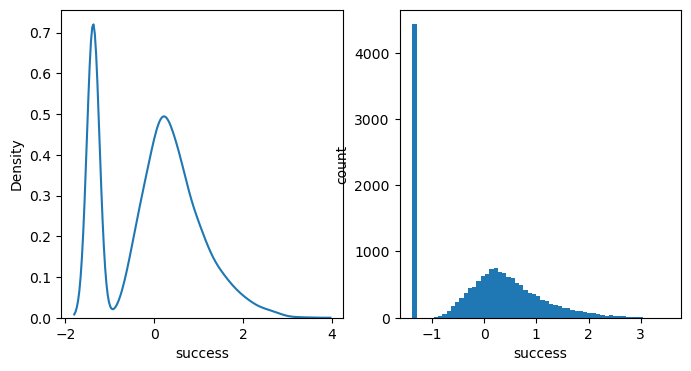

In [123]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.kdeplot(df_reg['success'])
plt.xlabel('success')
plt.subplot(1,2,2)
plt.hist(df_reg['success'], bins=60)
plt.xlabel('success')
plt.ylabel('count')
plt.show()

In [124]:
X = df_reg.iloc[:,1:-1]
y = df_reg.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len}')

Train size: 13780
Validation size: 1722
Test size: <built-in function len>


In [125]:
# Ridge Linear Regression

rlr_model = Ridge(alpha=1.0)

rlr_model.fit(X_train, y_train)

y_pred = rlr_model.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

RMSE: 0.0253
R²: -0.0456


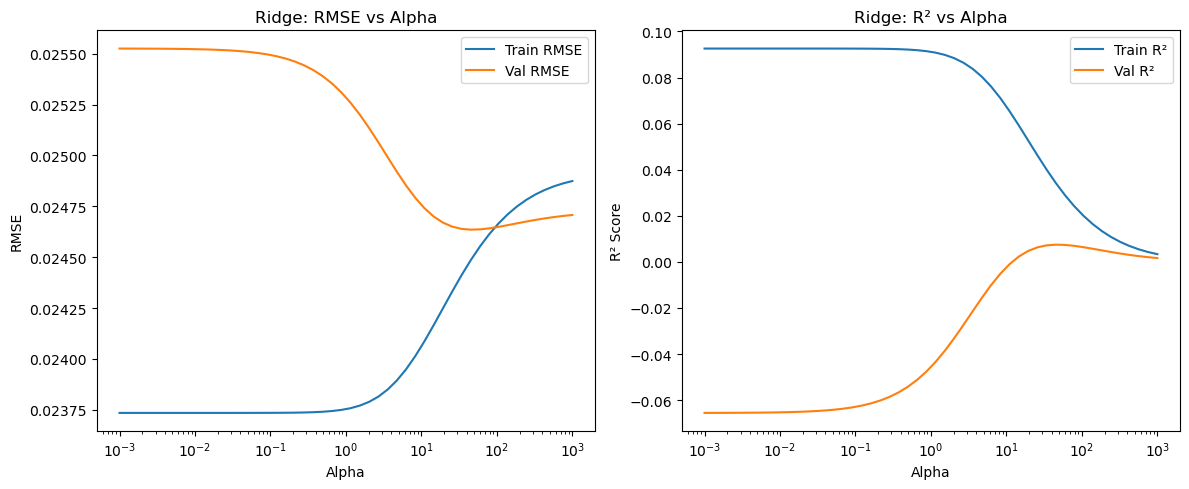

In [126]:
alpha_list = []
rmse_train_list = []
rmse_val_list = []
r2_train_list = []
r2_val_list = []

for alpha in np.logspace(-3, 3, 50):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_val = root_mean_squared_error(y_val, y_val_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)

    alpha_list.append(alpha)
    rmse_train_list.append(rmse_train)
    rmse_val_list.append(rmse_val)
    r2_train_list.append(r2_train)
    r2_val_list.append(r2_val)

plt.figure(figsize=(12, 5))

# RMSE Plot
plt.subplot(1, 2, 1)
plt.plot(alpha_list, rmse_train_list, label="Train RMSE")
plt.plot(alpha_list, rmse_val_list, label="Val RMSE")
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Ridge: RMSE vs Alpha")
plt.legend()

# R² Plot
plt.subplot(1, 2, 2)
plt.plot(alpha_list, r2_train_list, label="Train R²")
plt.plot(alpha_list, r2_val_list, label="Val R²")
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Ridge: R² vs Alpha")
plt.legend()

plt.tight_layout()
plt.show()


In [127]:
optimal_alpha = (
    alpha_list[rmse_val_list.index(min(rmse_val_list))] +
    alpha_list[r2_val_list.index(max(r2_val_list))]
)/2

rlr_model_2 = Ridge(alpha=optimal_alpha)

rlr_model_2.fit(X_train, y_train)

y_pred = rlr_model_2.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Optimal RMSE: {rmse:.4f}')
print(f'Optimal R²: {r2:.4f}')


Optimal RMSE: 0.0246
Optimal R²: 0.0075


[0]	validation_0-rmse:0.02479	validation_1-rmse:0.02473
[1]	validation_0-rmse:0.02467	validation_1-rmse:0.02472
[2]	validation_0-rmse:0.02454	validation_1-rmse:0.02471
[3]	validation_0-rmse:0.02442	validation_1-rmse:0.02471
[4]	validation_0-rmse:0.02433	validation_1-rmse:0.02471
[5]	validation_0-rmse:0.02422	validation_1-rmse:0.02471
[6]	validation_0-rmse:0.02412	validation_1-rmse:0.02471
[7]	validation_0-rmse:0.02400	validation_1-rmse:0.02471
[8]	validation_0-rmse:0.02391	validation_1-rmse:0.02471
[9]	validation_0-rmse:0.02381	validation_1-rmse:0.02471
[10]	validation_0-rmse:0.02370	validation_1-rmse:0.02471
[11]	validation_0-rmse:0.02360	validation_1-rmse:0.02471
[12]	validation_0-rmse:0.02350	validation_1-rmse:0.02471
[13]	validation_0-rmse:0.02342	validation_1-rmse:0.02471
[14]	validation_0-rmse:0.02334	validation_1-rmse:0.02472
[15]	validation_0-rmse:0.02325	validation_1-rmse:0.02472
[16]	validation_0-rmse:0.02314	validation_1-rmse:0.02473
[17]	validation_0-rmse:0.02305	validation

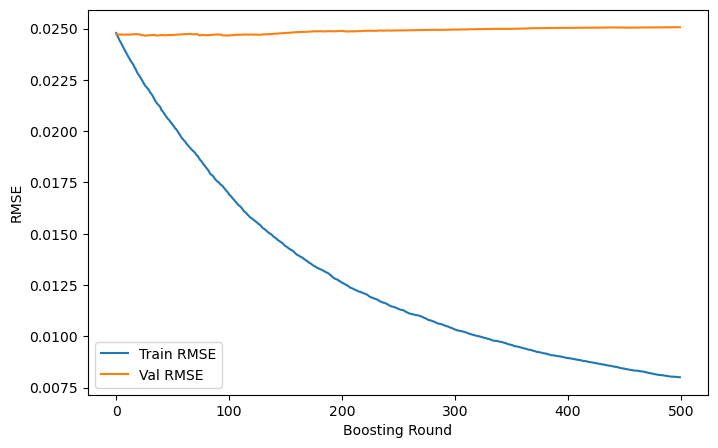

Starts overfitting at RMSE 0.0247


In [128]:
# XGB Regression

xgbr_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    eval_metric='rmse',
    random_state=0
)

xgbr_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

In [129]:
rmse_scorer = make_scorer(lambda y_true, y_pred: -root_mean_squared_error(y_true, y_pred))

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2, 2.5, 3]
}

xgbr = XGBRegressor(random_state=0)

random_search = RandomizedSearchCV(
    estimator=xgbr,
    param_distributions=param_dist,
    n_iter=30,
    scoring=rmse_scorer,
    cv=3,
    verbose=1,
    n_jobs=1,
    random_state=0
)

random_search.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
print(f'Validation RMSE: {rmse_val:.4f}')

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Validation RMSE: 0.0248


[0]	validation_0-rmse:0.02490	validation_1-rmse:0.02473
[1]	validation_0-rmse:0.02489	validation_1-rmse:0.02473
[2]	validation_0-rmse:0.02487	validation_1-rmse:0.02473
[3]	validation_0-rmse:0.02487	validation_1-rmse:0.02473
[4]	validation_0-rmse:0.02486	validation_1-rmse:0.02473
[5]	validation_0-rmse:0.02484	validation_1-rmse:0.02473
[6]	validation_0-rmse:0.02483	validation_1-rmse:0.02473
[7]	validation_0-rmse:0.02482	validation_1-rmse:0.02473
[8]	validation_0-rmse:0.02480	validation_1-rmse:0.02473
[9]	validation_0-rmse:0.02479	validation_1-rmse:0.02473
[10]	validation_0-rmse:0.02477	validation_1-rmse:0.02473
[11]	validation_0-rmse:0.02476	validation_1-rmse:0.02473
[12]	validation_0-rmse:0.02475	validation_1-rmse:0.02473
[13]	validation_0-rmse:0.02474	validation_1-rmse:0.02473
[14]	validation_0-rmse:0.02473	validation_1-rmse:0.02473
[15]	validation_0-rmse:0.02472	validation_1-rmse:0.02473
[16]	validation_0-rmse:0.02471	validation_1-rmse:0.02473
[17]	validation_0-rmse:0.02470	validation

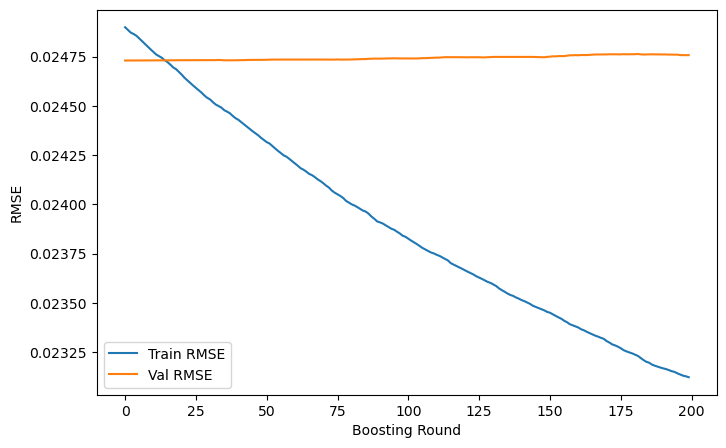

Starts overfitting at RMSE 0.0247


In [130]:
xgbr_model_2 = XGBRegressor(
    **random_search.best_params_,
    eval_metric='rmse',
    random_state=0
)

xgbr_model_2.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model_2.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model_2.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

[0]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[1]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[2]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[3]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[4]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[5]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[6]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[7]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[8]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[9]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[10]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[11]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[12]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[13]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[14]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[15]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[16]	validation_0-rmse:0.02492	validation_1-rmse:0.02473
[17]	validation_0-rmse:0.02492	validation

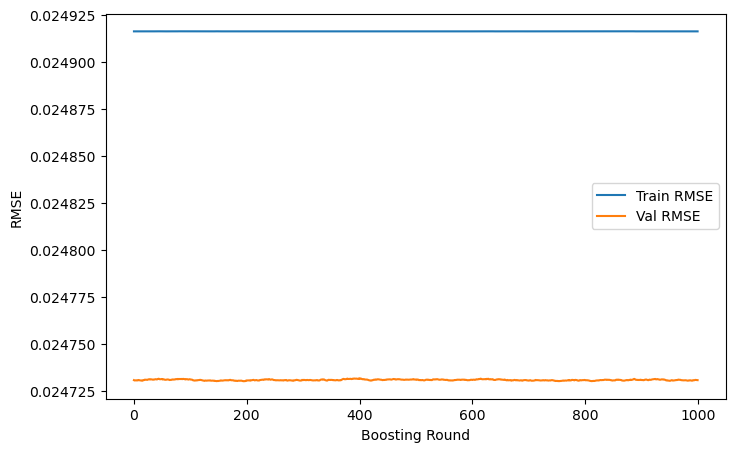

In [131]:
trial_params = {
    'max_depth': 4,
    'min_child_weight': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'gamma': 2,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'learning_rate': 0.05,
    'n_estimators': 1000
}


xgbr_model_3 = XGBRegressor(
    **trial_params,
    eval_metric='rmse',
    random_state=0
)

xgbr_model_3.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model_3.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model_3.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.8272e-04 - mae: 0.0144 - val_loss: 6.1333e-04 - val_mae: 0.0055
Epoch 2/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5868e-04 - mae: 0.0058 - val_loss: 6.1792e-04 - val_mae: 0.0034
Epoch 3/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.3704e-04 - mae: 0.0054 - val_loss: 6.3742e-04 - val_mae: 0.0080
Epoch 4/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2411e-04 - mae: 0.0064 - val_loss: 6.1843e-04 - val_mae: 0.0040
Epoch 5/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5630e-04 - mae: 0.0047 - val_loss: 6.2042e-04 - val_mae: 0.0032
Epoch 6/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8481e-04 - mae: 0.0039 - val_loss: 6.2269e-04 - val_mae: 0.0049
Epoch 7/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4223e-04 - mae: 0.0034 - val_loss: 6.5404e-04 - val_mae: 0.0058
Epoch 8/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1083e-04 - mae: 0.0038 - val_loss: 6.1904e-04 - val_mae: 0.0

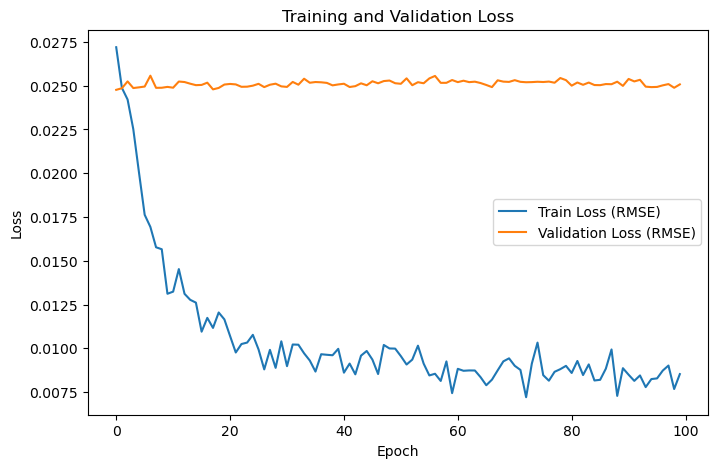

In [132]:
# Neural Network Regression

nnr_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

nnr_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = nnr_model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

y_pred = nnr_model.predict(X_val).flatten()

rmse_val = np.sqrt(root_mean_squared_error(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)

print(f'Validation RMSE: {rmse_val:.4f}')
print(f'Validation R²: {r2_val:.4f}')

plt.figure(figsize=(8,5))
plt.plot(np.sqrt(history.history['loss']), label='Train Loss (RMSE)')
plt.plot(np.sqrt(history.history['val_loss']), label='Validation Loss (RMSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147394
[LightGBM] [Info] Number of data points in the train set: 13780, number of used features: 999
[LightGBM] [Info] Start training from score 0.002794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

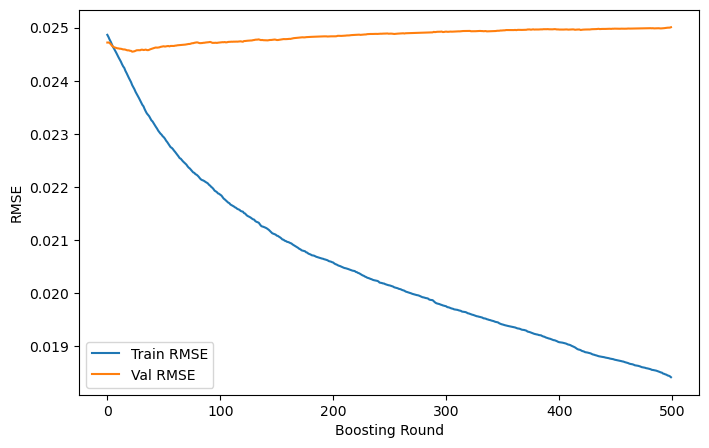

Starts overfitting at RMSE 0.0246 on iteration 6


In [133]:
# Light GBM Regression

lgbmr_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=0
)

lgbmr_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='rmse',
)

y_pred = lgbmr_model.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'Validation R2: {r2_val:.4f}')

evals_result = lgbmr_model.evals_result_

plt.figure(figsize=(8, 5))
plt.plot(evals_result['training']['rmse'], label='Train RMSE')
plt.plot(evals_result['valid_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

train_rmse = evals_result['training']['rmse']
val_rmse = evals_result['valid_1']['rmse']

for i in range(len(train_rmse)):
    if train_rmse[i] < val_rmse[i]:
        print(f'Starts overfitting at RMSE {train_rmse[i]:.4f} on iteration {i+1}')
        break

All models so far have to high an RMSE. Let's quickly try to restrict the data set to a more normal distribution (by removing zero ratings). This is a compromise, since we ommit some useful signal by removing this data.

# Regression - All Games with Non-Zero Ratings

In [134]:
df_reg = pd.read_csv('../data/vectorisation_attempt_2/preprocessed_games_pos_rating_reg.csv')
print(df_reg.shape)
df_reg

(12797, 1001)


,id,2d,3d,ability,able,access,acclaimed,account,achievement,achievements,...,workshop,world,wrong,www,xbox,year,young,zombie,zombies,zone
0,3498,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059353,...,0.000000,0.120845,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,3328,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.251483,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,4200,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032714,...,0.078900,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,4291,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051109,...,0.123265,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,5286,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.048035,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,337607,0.183969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.217129,0.0,0.0,0.0,0.0
12793,326782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.067879,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
12794,320395,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
12795,268298,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [135]:
df_reg.describe()

,id,2d,3d,ability,able,access,acclaimed,account,achievement,achievements,...,workshop,world,wrong,www,xbox,year,young,zombie,zombies,zone
count,1.279700e+04,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,...,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000
mean,1.310125e+05,0.017411,0.007257,0.015317,0.006967,0.010250,0.002290,0.007023,0.007091,0.025044,...,0.004208,0.043915,0.002586,0.006812,0.004246,0.013477,0.006841,0.006208,0.003880,0.002594
std,2.304513e+05,0.040411,0.030856,0.041159,0.029575,0.032418,0.020781,0.034854,0.034475,0.030338,...,0.023073,0.064158,0.021408,0.034366,0.035573,0.042664,0.033632,0.049021,0.022698,0.023500
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.197200e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.131400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.988300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048485,...,0.000000,0.070652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.003458e+06,0.522385,0.346855,0.435872,0.520995,0.520017,0.472602,0.426046,0.802867,0.274559,...,0.467823,0.538352,0.446118,0.496646,0.688413,0.481356,0.511962,0.884608,0.320824,0.813322


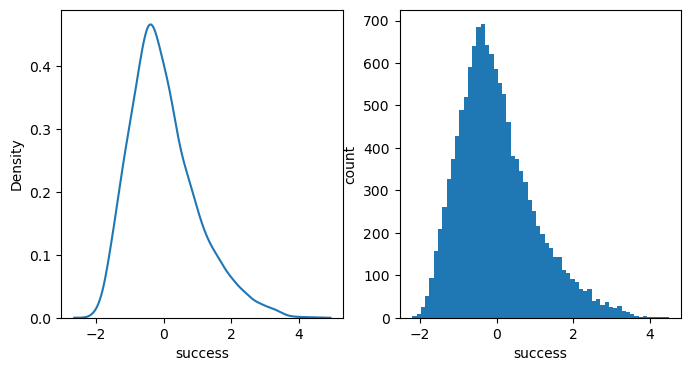

In [136]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.kdeplot(df_reg['success'])
plt.xlabel('success')
plt.subplot(1,2,2)
plt.hist(df_reg['success'], bins=60)
plt.xlabel('success')
plt.ylabel('count')
plt.show()

In [137]:
X = df_reg.iloc[:,1:-1]
y = df_reg.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len}')

Train size: 10237
Validation size: 1280
Test size: <built-in function len>


In [138]:
rlr_model_3 = Ridge(alpha=1.0)

rlr_model_3.fit(X_train, y_train)

y_pred = rlr_model_3.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

RMSE: 0.0192
R²: -0.1180


Not much of an improvement on the results using the previous dataset. Let's try our best model from last time to compare.

[0]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[1]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[2]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[3]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[4]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[5]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[6]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[7]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[8]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[9]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[10]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[11]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[12]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[13]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[14]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[15]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[16]	validation_0-rmse:0.02450	validation_1-rmse:0.01820
[17]	validation_0-rmse:0.02450	validation

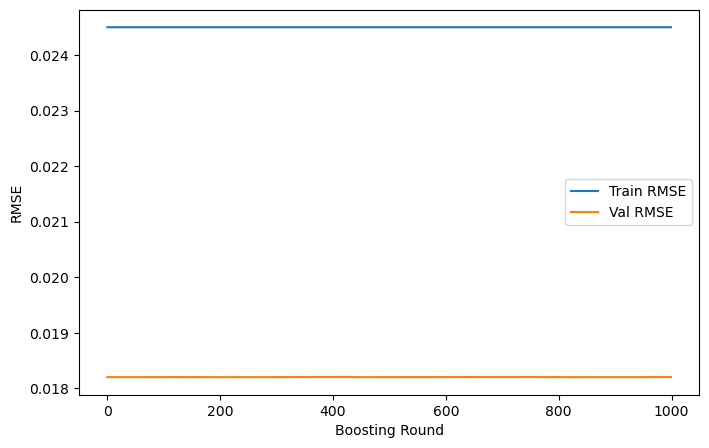

In [139]:
trial_params = {
    'max_depth': 4,
    'min_child_weight': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'gamma': 2,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'learning_rate': 0.05,
    'n_estimators': 1000
}


xgbr_model_4 = XGBRegressor(
    **trial_params,
    eval_metric='rmse',
    random_state=0
)

xgbr_model_4.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model_4.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model_4.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

This is better - but still not enough of an improvement to warrant an approach where we have remove such a large portion of the dataset (all zero ratings) that may carry signal.

We will now try a different approach that includes zero ratings, but doesn't focus overly on the actual value of the success score (which is a proxy after all): binning. We will start with 4 bins: zero rating, low, medium and high success.

# Classification - Four Categories

In [145]:
# To keep track of our classifier models, we will unpack the classification report and store its values in a dataframe

def add_to_cat_4_record(performance_record: pd.DataFrame, model_name: str, report, accuracy) -> pd.DataFrame:
    if model_name in performance_record['model'].values:
        return performance_record
    
    new_row = {
        'model': model_name,
        'accuracy': accuracy,
        'f1_weighted': report['weighted avg']['f1-score'],
        'precision_0': report['0.0']['precision'],
        'precision_1': report['1.0']['precision'],
        'precision_2': report['2.0']['precision'],
        'precision_3': report['3.0']['precision'],
        'recall_0': report['0.0']['recall'],
        'recall_1': report['1.0']['recall'],
        'recall_2': report['2.0']['recall'],
        'recall_3': report['3.0']['recall'],
        'f1_0': report['0.0']['f1-score'],
        'f1_1': report['1.0']['f1-score'],
        'f1_2': report['2.0']['f1-score'],
        'f1_3': report['3.0']['f1-score']
    }

    new_df = pd.DataFrame([new_row])
    performance_record = pd.concat([performance_record, new_df], ignore_index=True)
    return performance_record

In [146]:
df_cat_4 = pd.read_csv('../data/vectorisation_attempt_2/preprocessed_games_cat_4.csv')

cat_4_performance_record = pd.DataFrame(columns=['model', 'accuracy', 'f1_weighted', 'precision_0', 'precision_1', 'precision_2', 'precision_3', 'recall_0', 'recall_1', 'recall_2', 'recall_3', 'f1_0', 'f1_1', 'f1_2', 'f1_3'])

df_cat_4

,id,2d,3d,ability,able,access,account,achievement,achievements,action,...,world,wrong,www,xbox,year,young,zombie,zombies,zone,success_class
0,3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061058,0.000000,...,0.126401,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0
1,3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.127915,...,0.252331,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0
2,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030338,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0
3,4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050617,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0
4,5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.251497,...,0.049611,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,320395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0
17221,311674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031070,0.000000,...,0.032160,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
17222,290056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061092,0.000000,...,0.063236,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
17223,268298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0


In [147]:
print(df_cat_4['success_class'].value_counts().sort_index())

success_class
0.0    4428
1.0    4267
2.0    4264
3.0    4266
Name: count, dtype: int64


In [148]:
X = df_cat_4.iloc[:,1:-1]
y = df_cat_4.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len(X_test)}')

print(f'Train distribution: {y_train.value_counts().sort_index()}')
print(f'Validation distribution: {y_val.value_counts().sort_index()}')
print(f'Test distribution: {y_test.value_counts().sort_index()}')

Train size: 13780
Validation size: 1722
Test size: 1723
Train distribution: success_class
0.0    3542
1.0    3414
2.0    3411
3.0    3413
Name: count, dtype: int64
Validation distribution: success_class
0.0    443
1.0    426
2.0    426
3.0    427
Name: count, dtype: int64
Test distribution: success_class
0.0    443
1.0    427
2.0    427
3.0    426
Name: count, dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model

Early stopping activated - iteration 16


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


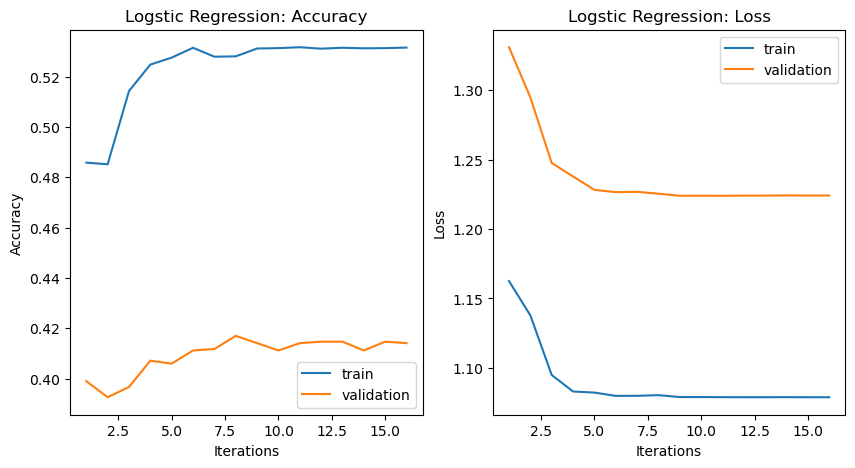

--- Validation Set Scores ---
Accuracy: 0.4140534262485482
Loss 1.2241208205262204


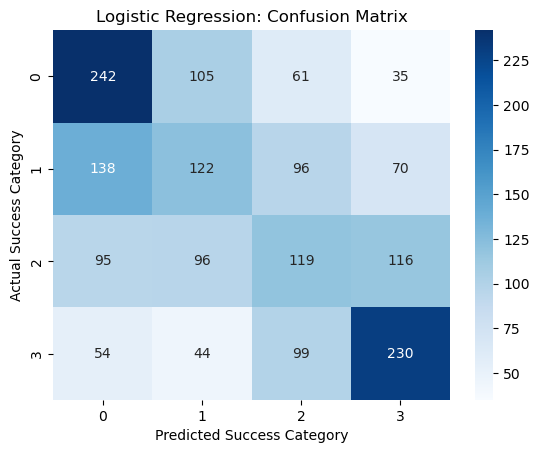

Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.55      0.50       443
         1.0       0.33      0.29      0.31       426
         2.0       0.32      0.28      0.30       426
         3.0       0.51      0.54      0.52       427

    accuracy                           0.41      1722
   macro avg       0.40      0.41      0.41      1722
weighted avg       0.40      0.41      0.41      1722



/var/folders/58/jk9t7ygx41zcr6078k3w_g580000gn/T/ipykernel_18843/2804746553.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_record = pd.concat([performance_record, new_df], ignore_index=True)


In [149]:
# Logistic Regression

accuracy_train_list = []
accuracy_val_list = []
loss_train_list = []
loss_val_list = []
iteration_list = []

lowest_loss = np.inf
consecutive_loss_fall = 0
for i in range(1, 1000):
    lr_model = LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        max_iter=i,
        warm_start=True, # to keep previous coefficients
        random_state=0
    )

    lr_model.fit(X_train, y_train)

    y_hat_train = lr_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_hat_train)
    accuracy_train_list.append(accuracy_train)
    y_proba_train = lr_model.predict_proba(X_train)
    loss_train = log_loss(y_train, y_proba_train)
    loss_train_list.append(loss_train)

    y_hat_val = lr_model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_hat_val)
    accuracy_val_list.append(accuracy_val)
    y_proba_val = lr_model.predict_proba(X_val)
    loss_val = log_loss(y_val, y_proba_val)
    loss_val_list.append(loss_val)

    iteration_list.append(i)

    if loss_val < lowest_loss:
        lowest_loss = loss_val
        consecutive_loss_fall = 0
    else:
        consecutive_loss_fall += 1
    
    if consecutive_loss_fall == 5:
        print(f"Early stopping activated - iteration {i}")
        break
    else:
        continue

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(iteration_list, accuracy_train_list, label="train")
plt.plot(iteration_list, accuracy_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Logstic Regression: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(iteration_list, loss_train_list, label="train")
plt.plot(iteration_list, loss_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logstic Regression: Loss")
plt.legend()

plt.show()

y_hat_val = lr_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
y_proba_val = lr_model.predict_proba(X_val)
loss_val = log_loss(y_val, y_proba_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}\nLoss {loss_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

print(f"Classification Report:\n{classification_report(y_val, y_hat_val)}")

cat_4_performance_record = add_to_cat_4_record(
    cat_4_performance_record,
    'lr_model',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

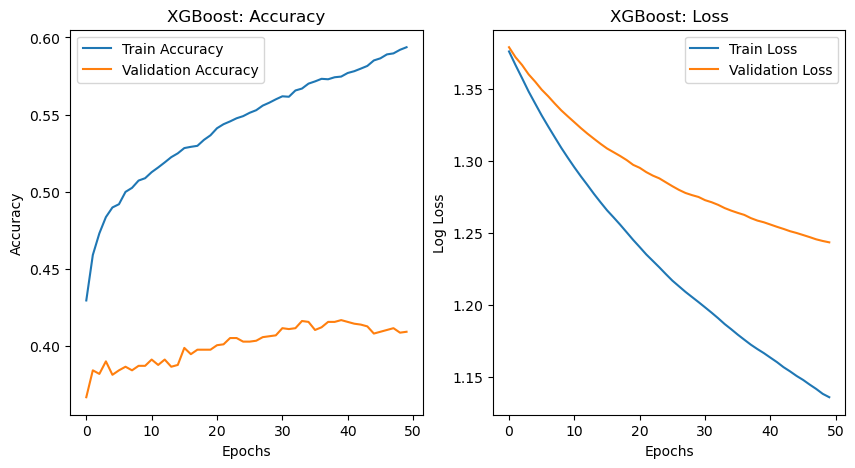

--- Validation Set Scores ---
Accuracy: 0.4094076655052265


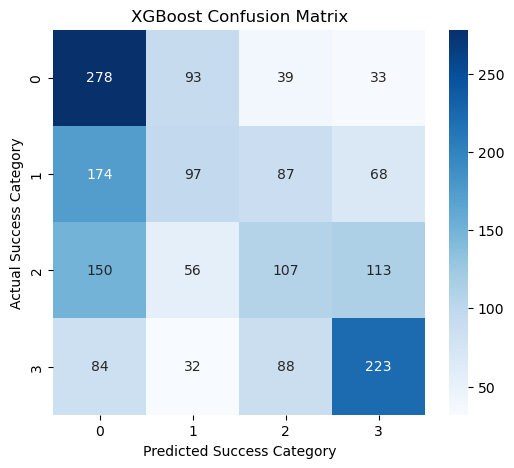

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.41      0.63      0.49       443
         1.0       0.35      0.23      0.28       426
         2.0       0.33      0.25      0.29       426
         3.0       0.51      0.52      0.52       427

    accuracy                           0.41      1722
   macro avg       0.40      0.41      0.39      1722
weighted avg       0.40      0.41      0.39      1722



In [150]:
# XGB Classification

dm_train = xgb.DMatrix(X_train, label=y_train)
dm_val = xgb.DMatrix(X_val, label=y_val)
dm_test = xgb.DMatrix(X_test, label=y_test)

model_parameters = {
    "objective": "multi:softmax",
    "num_class": 4,
    "eval_metric": ["mlogloss", "merror"],
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

evals_result = {} # store training history

xgbc_model = xgb.train(
    model_parameters,
    dm_train,
    num_boost_round=100,
    evals=[(dm_train, "train"), (dm_val, "val")],
    evals_result = evals_result,
    early_stopping_rounds = 10,
    verbose_eval = False
)

num_epochs = len(evals_result["train"]["mlogloss"])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(num_epochs), 1 - np.array(evals_result["train"]["merror"]), label="Train Accuracy")
plt.plot(range(num_epochs), 1 - np.array(evals_result["val"]["merror"]), label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("XGBoost: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs), evals_result["train"]["mlogloss"], label="Train Loss")
plt.plot(range(num_epochs), evals_result["val"]["mlogloss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("XGBoost: Loss")
plt.legend()

plt.show()

y_hat_val = xgbc_model.predict(dm_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("XGBoost Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_4_performance_record = add_to_cat_4_record(
    cat_4_performance_record,
    'xgbc_model',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

In [151]:
cat_4_performance_record

,model,accuracy,f1_weighted,precision_0,precision_1,precision_2,precision_3,recall_0,recall_1,recall_2,recall_3,f1_0,f1_1,f1_2,f1_3
0,lr_model,0.414053,0.407639,0.457467,0.332425,0.317333,0.509978,0.546275,0.286385,0.279343,0.538642,0.497942,0.307692,0.297129,0.523918
1,xgbc_model,0.409408,0.393737,0.405248,0.348921,0.333333,0.510297,0.627540,0.227700,0.251174,0.522248,0.492471,0.275568,0.286479,0.516204


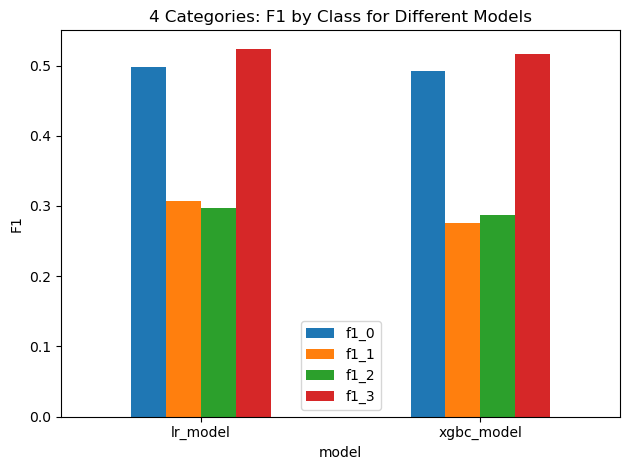

In [152]:
cat_4_performance_record.set_index('model')[['f1_0', 'f1_1', 'f1_2', 'f1_3']].plot(kind='bar')
plt.ylabel("F1")
plt.title("4 Categories: F1 by Class for Different Models")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

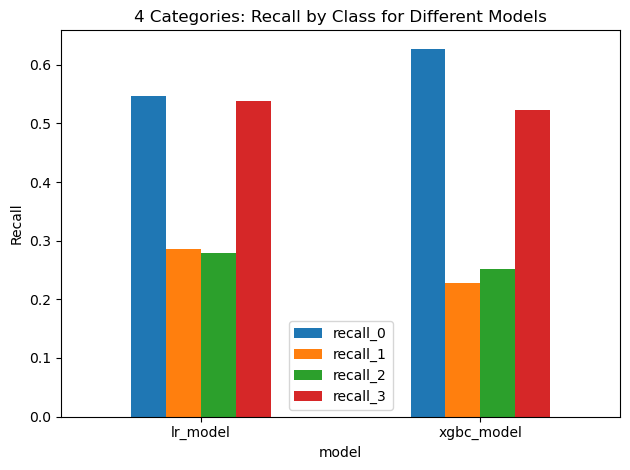

In [153]:
cat_4_performance_record.set_index('model')[['recall_0', 'recall_1', 'recall_2', 'recall_3']].plot(kind='bar')
plt.ylabel("Recall")
plt.title("4 Categories: Recall by Class for Different Models")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

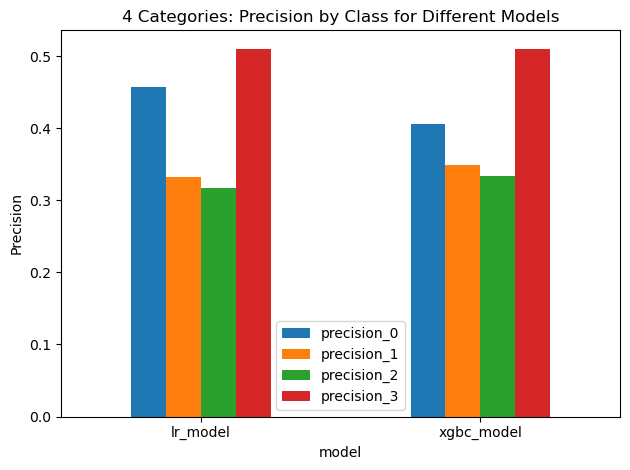

In [154]:
cat_4_performance_record.set_index('model')[['precision_0', 'precision_1', 'precision_2', 'precision_3']].plot(kind='bar')
plt.ylabel("Precision")
plt.title("4 Categories: Precision by Class for Different Models")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [155]:
cat_4_performance_record.to_csv('../model_evals/vectorisation_attempt_2/cat_4_performance_record.csv', index=False)

Our classifiers are generally poor with differentiating middle categories from the extreme top and bottom categories.

It might be easier if we split the data into only three categories - zero ratings, normal success and higher success.

# Classification - Three Categories

In [156]:
def add_to_cat_3_record(performance_record: pd.DataFrame, model_name: str, report, accuracy) -> pd.DataFrame:
    if model_name in performance_record['model'].values:
        return performance_record
    
    new_row = {
        'model': model_name,
        'accuracy': accuracy,
        'f1_weighted': report['weighted avg']['f1-score'],
        'precision_0': report['0.0']['precision'],
        'precision_1': report['1.0']['precision'],
        'precision_2': report['2.0']['precision'],
        'recall_0': report['0.0']['recall'],
        'recall_1': report['1.0']['recall'],
        'recall_2': report['2.0']['recall'],
        'f1_0': report['0.0']['f1-score'],
        'f1_1': report['1.0']['f1-score'],
        'f1_2': report['2.0']['f1-score']
    }

    new_df = pd.DataFrame([new_row])
    performance_record = pd.concat([performance_record, new_df], ignore_index=True)
    return performance_record

In [157]:
df_cat_3 = pd.read_csv('../data/vectorisation_attempt_2/preprocessed_games_cat_3.csv')

cat_3_performance_record = pd.DataFrame(columns=['model','accuracy','f1_weighted', 'precision_0', 'precision_1', 'precision_2', 'recall_0', 'recall_1', 'recall_2', 'f1_0', 'f1_1', 'f1_2'])

df_cat_3

,id,2d,3d,ability,able,access,account,achievement,achievements,action,...,world,wrong,www,xbox,year,young,zombie,zombies,zone,success_class
0,3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061058,0.000000,...,0.126401,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0
1,3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.127915,...,0.252331,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0
2,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030338,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0
3,4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050617,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0
4,5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.251497,...,0.049611,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,320395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
17221,311674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031070,0.000000,...,0.032160,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
17222,290056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061092,0.000000,...,0.063236,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
17223,268298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0


In [158]:
print(df_cat_3['success_class'].value_counts().sort_index())

success_class
0.0    4428
1.0    6399
2.0    6398
Name: count, dtype: int64


In [159]:
X = df_cat_3.iloc[:,1:-1]
y = df_cat_3.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len(X_test)}')

print(f'Train distribution: {y_train.value_counts().sort_index()}')
print(f'Validation distribution: {y_val.value_counts().sort_index()}')
print(f'Test distribution: {y_val.value_counts().sort_index()}')

Train size: 13780
Validation size: 1722
Test size: 1723
Train distribution: success_class
0.0    3542
1.0    5119
2.0    5119
Name: count, dtype: int64
Validation distribution: success_class
0.0    443
1.0    640
2.0    639
Name: count, dtype: int64
Test distribution: success_class
0.0    443
1.0    640
2.0    639
Name: count, dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model

Early stopping activated - iteration 12


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


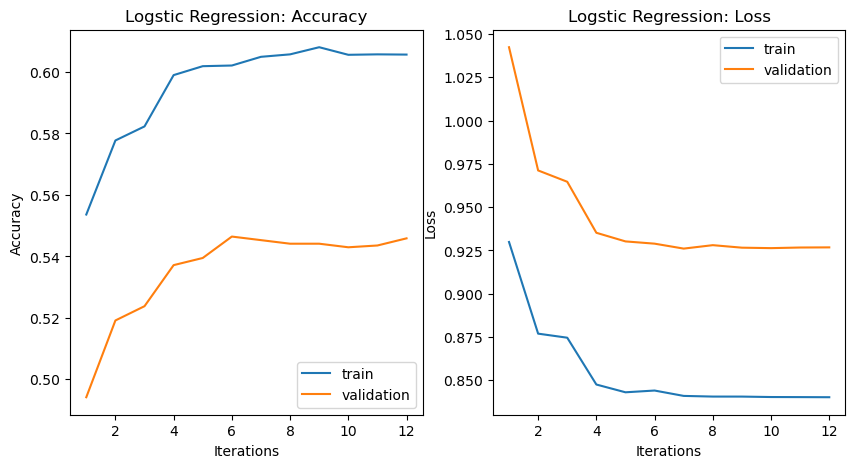

--- Validation Set Scores ---
Accuracy: 0.5458768873403019
Loss 0.9267761325095026


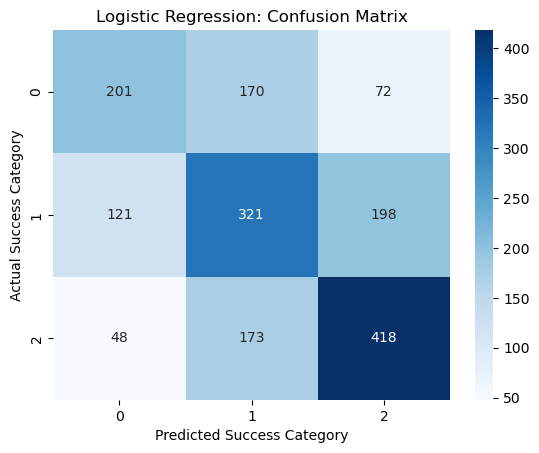

Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.45      0.49       443
         1.0       0.48      0.50      0.49       640
         2.0       0.61      0.65      0.63       639

    accuracy                           0.55      1722
   macro avg       0.54      0.54      0.54      1722
weighted avg       0.54      0.55      0.54      1722



/var/folders/58/jk9t7ygx41zcr6078k3w_g580000gn/T/ipykernel_18843/1386029636.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_record = pd.concat([performance_record, new_df], ignore_index=True)


In [160]:
# Logistic Regression

accuracy_train_list = []
accuracy_val_list = []
loss_train_list = []
loss_val_list = []
iteration_list = []

lowest_loss = np.inf
consecutive_loss_fall = 0
for i in range(1, 1000):
    lr_model_2 = LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        max_iter=i,
        warm_start=True, # to keep previous coefficients
        random_state=0
    )

    lr_model_2.fit(X_train, y_train)

    y_hat_train = lr_model_2.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_hat_train)
    accuracy_train_list.append(accuracy_train)
    y_proba_train = lr_model_2.predict_proba(X_train)
    loss_train = log_loss(y_train, y_proba_train)
    loss_train_list.append(loss_train)

    y_hat_val = lr_model_2.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_hat_val)
    accuracy_val_list.append(accuracy_val)
    y_proba_val = lr_model_2.predict_proba(X_val)
    loss_val = log_loss(y_val, y_proba_val)
    loss_val_list.append(loss_val)

    iteration_list.append(i)

    if loss_val < lowest_loss:
        lowest_loss = loss_val
        consecutive_loss_fall = 0
    else:
        consecutive_loss_fall += 1
    
    if consecutive_loss_fall == 5:
        print(f"Early stopping activated - iteration {i}")
        break
    else:
        continue

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(iteration_list, accuracy_train_list, label="train")
plt.plot(iteration_list, accuracy_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Logstic Regression: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(iteration_list, loss_train_list, label="train")
plt.plot(iteration_list, loss_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logstic Regression: Loss")
plt.legend()

plt.show()

y_hat_val = lr_model_2.predict(X_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
y_proba_val = lr_model_2.predict_proba(X_val)
loss_val = log_loss(y_val, y_proba_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}\nLoss {loss_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

print(f"Classification Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'lr_model_2',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

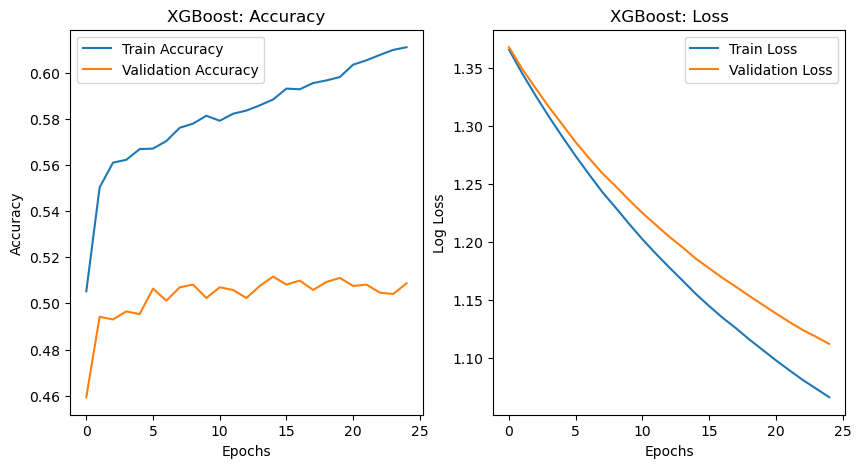

--- Validation Set Scores ---
Accuracy: 0.5087108013937283


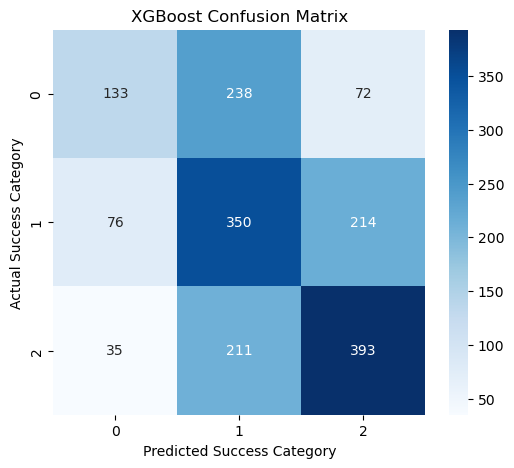

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.55      0.30      0.39       443
         1.0       0.44      0.55      0.49       640
         2.0       0.58      0.62      0.60       639

    accuracy                           0.51      1722
   macro avg       0.52      0.49      0.49      1722
weighted avg       0.52      0.51      0.50      1722



In [161]:
# XGB Classification

dm_train = xgb.DMatrix(X_train, label=y_train)
dm_val = xgb.DMatrix(X_val, label=y_val)
dm_test = xgb.DMatrix(X_test, label=y_test)

model_parameters = {
    "objective": "multi:softmax",
    "num_class": 4,
    "eval_metric": ["mlogloss", "merror"],
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

evals_result = {} # store training history

xgbc_model_2 = xgb.train(
    model_parameters,
    dm_train,
    num_boost_round=100,
    evals=[(dm_train, "train"), (dm_val, "val")],
    evals_result = evals_result,
    early_stopping_rounds = 10,
    verbose_eval = False
)

num_epochs = len(evals_result["train"]["mlogloss"])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(num_epochs), 1 - np.array(evals_result["train"]["merror"]), label="Train Accuracy")
plt.plot(range(num_epochs), 1 - np.array(evals_result["val"]["merror"]), label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("XGBoost: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs), evals_result["train"]["mlogloss"], label="Train Loss")
plt.plot(range(num_epochs), evals_result["val"]["mlogloss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("XGBoost: Loss")
plt.legend()

plt.show()

y_hat_val = xgbc_model_2.predict(dm_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("XGBoost Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'xgbc_model_2',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

--- Validation Set Scores ---
Accuracy: 0.49419279907084784


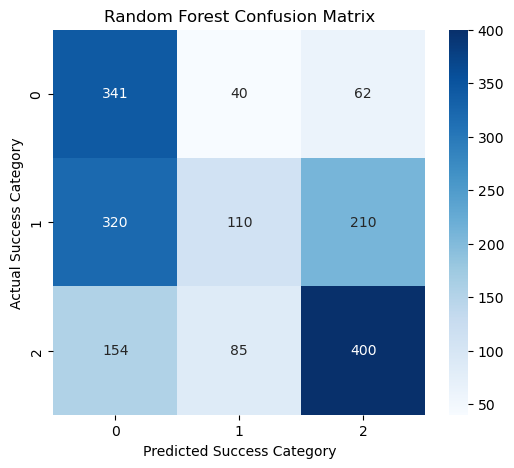

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.42      0.77      0.54       443
         1.0       0.47      0.17      0.25       640
         2.0       0.60      0.63      0.61       639

    accuracy                           0.49      1722
   macro avg       0.49      0.52      0.47      1722
weighted avg       0.50      0.49      0.46      1722



In [162]:
# Random Forest Classification

rfc_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=0,
    n_jobs=-1,
    class_weight='balanced'
)

rfc_model.fit(X_train, y_train)

y_hat_val = rfc_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Random Forest Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'rfc_model',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4321 - loss: 1.0409 - val_accuracy: 0.5180 - val_loss: 0.9350
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5544 - loss: 0.9026 - val_accuracy: 0.5441 - val_loss: 0.9144
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6031 - loss: 0.8463 - val_accuracy: 0.5285 - val_loss: 0.9206
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6343 - loss: 0.7988 - val_accuracy: 0.5412 - val_loss: 0.9245
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6780 - loss: 0.7415 - val_accuracy: 0.5325 - val_loss: 0.9626
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7149 - loss: 0.6749 - val_accuracy: 0.5372 - val_loss: 0.9948
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7629 - loss: 0.5963 - val_accuracy: 0.5331 - val_loss: 1.0554
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7903 - loss: 0.5292 - val_accuracy: 0.5285 - val_

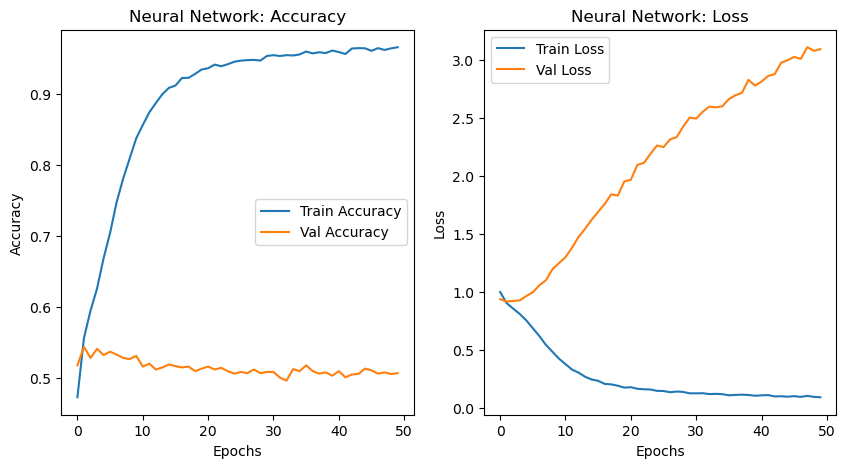

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.5063 - loss: 3.1758
--- Validation Set Scores ---
Accuracy: 0.50696861743927
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step


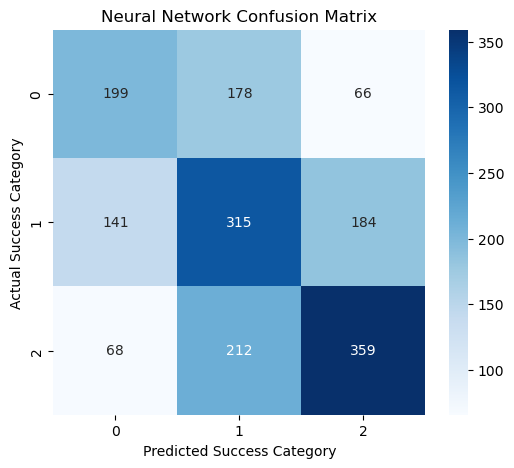

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.49      0.45      0.47       443
         1.0       0.45      0.49      0.47       640
         2.0       0.59      0.56      0.58       639

    accuracy                           0.51      1722
   macro avg       0.51      0.50      0.50      1722
weighted avg       0.51      0.51      0.51      1722



In [163]:
# Neural Network Classification

y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

nn_model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

nn_model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_2.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_2.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_2.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_2',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4073 - loss: 1.1418 - val_accuracy: 0.4983 - val_loss: 1.0090
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5380 - loss: 0.9218 - val_accuracy: 0.5209 - val_loss: 0.9313
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5886 - loss: 0.8483 - val_accuracy: 0.5377 - val_loss: 0.9264
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6341 - loss: 0.7805 - val_accuracy: 0.5209 - val_loss: 0.9610
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6988 - loss: 0.6869 - val_accuracy: 0.5331 - val_loss: 0.9844
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7332 - loss: 0.6179 - val_accuracy: 0.5325 - val_loss: 1.0642
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7689 - loss: 0.5435 - val_accuracy: 0.5244 - val_loss: 1.1229
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7957 - loss: 0.4824 - val_accuracy: 0.5209 - val_

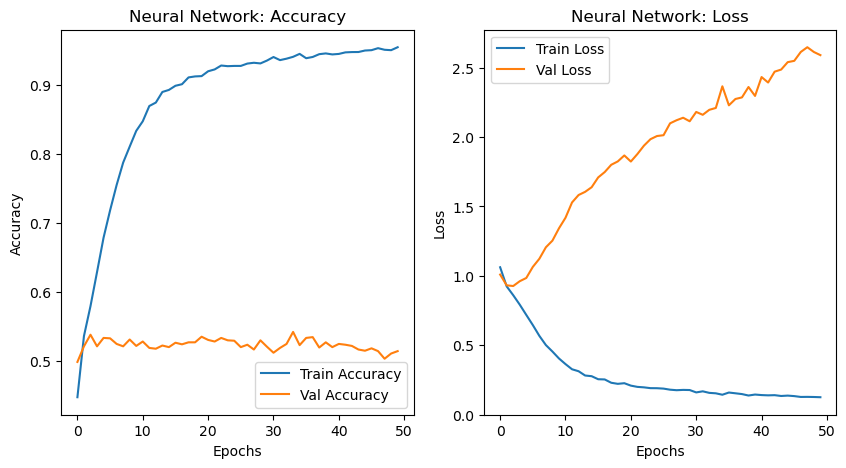

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5179 - loss: 2.7533
--- Validation Set Scores ---
Accuracy: 0.5139372944831848
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


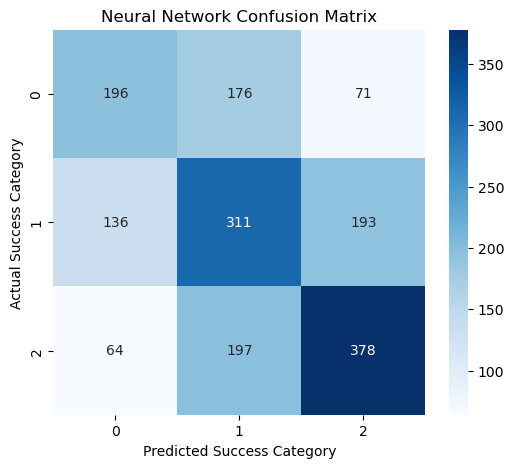

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.49      0.44      0.47       443
         1.0       0.45      0.49      0.47       640
         2.0       0.59      0.59      0.59       639

    accuracy                           0.51      1722
   macro avg       0.51      0.51      0.51      1722
weighted avg       0.51      0.51      0.51      1722



In [164]:
# increased layer size, added extra dropout, added batch normalization

nn_model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

nn_model_3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_3.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_3.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_3.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_3',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4135 - loss: 1.1282 - val_accuracy: 0.5134 - val_loss: 1.0037 - learning_rate: 0.0010
Epoch 2/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5458 - loss: 0.9152 - val_accuracy: 0.5337 - val_loss: 0.9230 - learning_rate: 0.0010
Epoch 3/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6080 - loss: 0.8425 - val_accuracy: 0.5499 - val_loss: 0.9187 - learning_rate: 0.0010
Epoch 4/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6450 - loss: 0.7767 - val_accuracy: 0.5389 - val_loss: 0.9425 - learning_rate: 0.0010
Epoch 5/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6956 - loss: 0.6940 - val_accuracy: 0.5395 - val_loss: 0.9739 - learning_rate: 0.0010
Epoch 6/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7389 - loss: 0.6154 - val_accuracy: 0.5221 - val_loss: 1.0436 - learning_rate: 0.0010
Epoch 7/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7946 - loss: 0.5143 - val_a

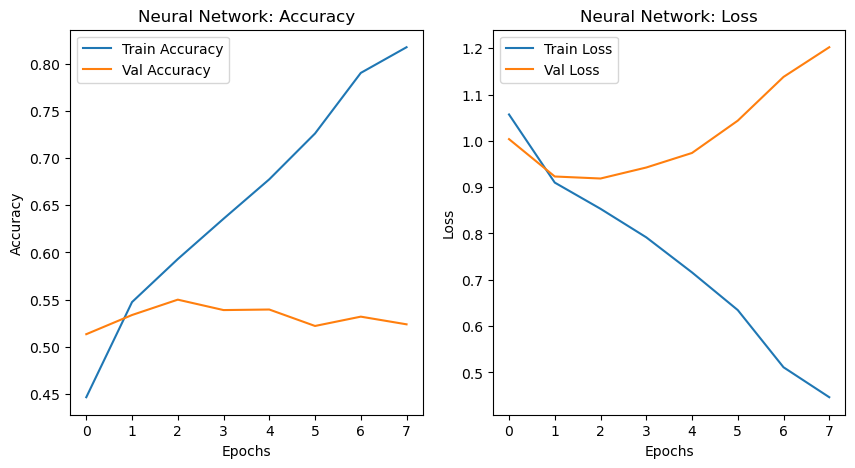

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.5607 - loss: 0.9286
--- Validation Set Scores ---
Accuracy: 0.5499419569969177
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step


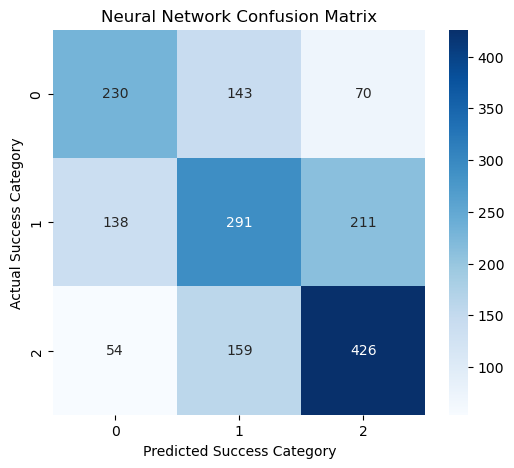

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.55      0.52      0.53       443
         1.0       0.49      0.45      0.47       640
         2.0       0.60      0.67      0.63       639

    accuracy                           0.55      1722
   macro avg       0.55      0.55      0.55      1722
weighted avg       0.55      0.55      0.55      1722



In [165]:
# implemented early stopping and reducelronplateau
# also added class weighting

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

class_weights = dict(zip(
    np.unique(y_train),
    compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
))

nn_model_4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

nn_model_4.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_4.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_4.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_4.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_4',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4401 - loss: 1.1422 - val_accuracy: 0.5046 - val_loss: 0.9631 - learning_rate: 0.0010
Epoch 2/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5587 - loss: 0.9077 - val_accuracy: 0.5337 - val_loss: 0.9208 - learning_rate: 0.0010
Epoch 3/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5868 - loss: 0.8508 - val_accuracy: 0.5343 - val_loss: 0.9340 - learning_rate: 0.0010
Epoch 4/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6252 - loss: 0.7976 - val_accuracy: 0.5354 - val_loss: 0.9504 - learning_rate: 0.0010
Epoch 5/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6526 - loss: 0.7617 - val_accuracy: 0.5221 - val_loss: 0.9759 - learning_rate: 0.0010
Epoch 6/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7030 - loss: 0.6801 - val_accuracy: 0.5331 - val_loss: 0.9881 - learning_rate: 5.0000e-04
Epoch 7/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7393 - loss: 0.6289 - v

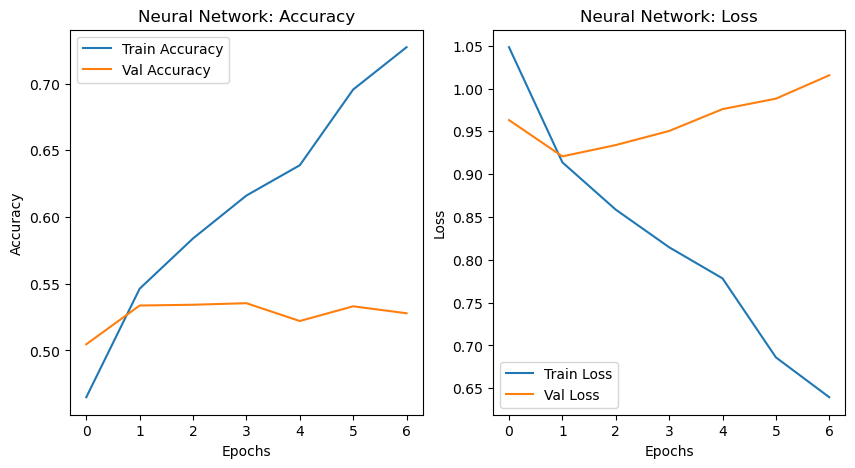

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.5114 - loss: 0.9462
--- Validation Set Scores ---
Accuracy: 0.5336817502975464
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


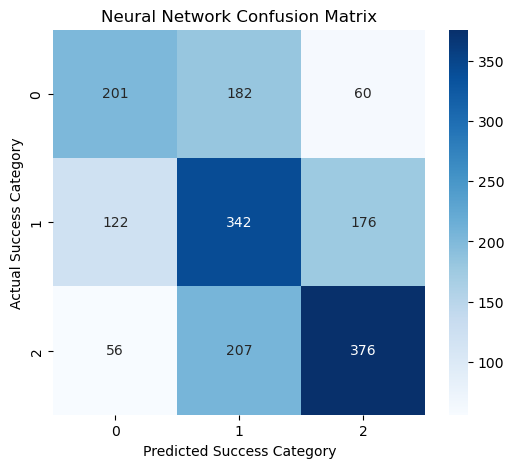

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.53      0.45      0.49       443
         1.0       0.47      0.53      0.50       640
         2.0       0.61      0.59      0.60       639

    accuracy                           0.53      1722
   macro avg       0.54      0.53      0.53      1722
weighted avg       0.54      0.53      0.53      1722



In [166]:
# added leakyrelu and increased model depth

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

class_weights = dict(zip(
    np.unique(y_train),
    compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
))

nn_model_5 = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    LeakyReLU(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128),
    LeakyReLU(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(),
    Dense(3, activation='softmax')
])

nn_model_5.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_5.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_5.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_5.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_5',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

In [167]:
cat_3_performance_record

,model,accuracy,f1_weighted,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,f1_0,f1_1,f1_2
0,lr_model_2,0.545877,0.543964,0.543243,0.483434,0.607558,0.453725,0.501563,0.654147,0.494465,0.492331,0.629992
1,xgbc_model_2,0.508711,0.501699,0.545082,0.438048,0.578792,0.300226,0.546875,0.615023,0.387191,0.486449,0.596358
2,rfc_model,0.494193,0.459355,0.418405,0.468085,0.595238,0.769752,0.171875,0.625978,0.542130,0.251429,0.610221
3,nn_model_2,0.506969,0.507893,0.487745,0.446809,0.589491,0.449210,0.492188,0.561815,0.467685,0.468401,0.575321
4,nn_model_3,0.513937,0.513797,0.494949,0.454678,0.588785,0.442438,0.485938,0.591549,0.467223,0.469789,0.590164
5,nn_model_4,0.549942,0.547128,0.545024,0.490725,0.602546,0.519187,0.454688,0.666667,0.531792,0.472019,0.632987
6,nn_model_5,0.533682,0.534300,0.530343,0.467852,0.614379,0.453725,0.534375,0.588419,0.489051,0.498906,0.601119


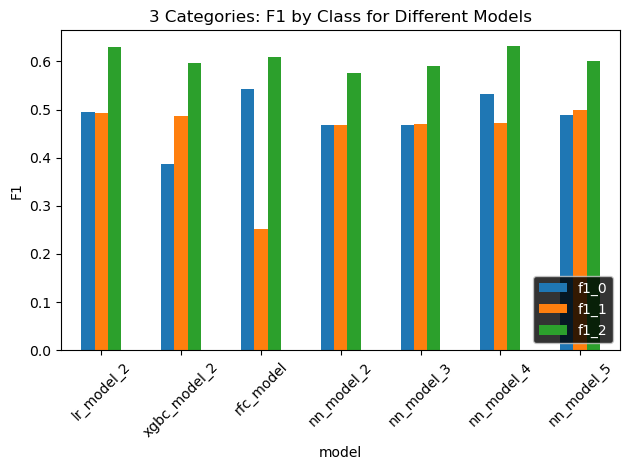

In [168]:
cat_3_performance_record.set_index('model')[['f1_0', 'f1_1', 'f1_2']].plot(kind='bar')
plt.ylabel("F1")
plt.title("3 Categories: F1 by Class for Different Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right', facecolor='black', labelcolor = 'white')
plt.tight_layout()
plt.show()

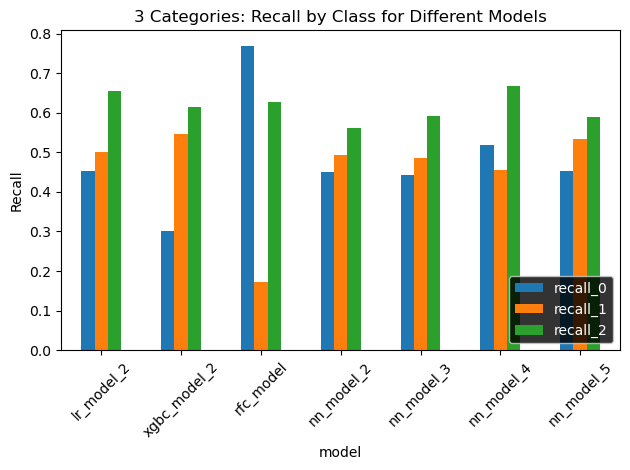

In [169]:
cat_3_performance_record.set_index('model')[['recall_0', 'recall_1', 'recall_2']].plot(kind='bar')
plt.ylabel("Recall")
plt.title("3 Categories: Recall by Class for Different Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right', facecolor='black', labelcolor = 'white')
plt.tight_layout()
plt.show()

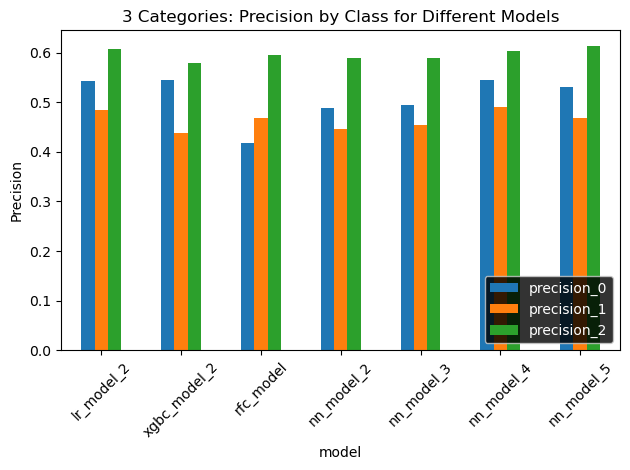

In [170]:
cat_3_performance_record.set_index('model')[['precision_0', 'precision_1', 'precision_2']].plot(kind='bar')
plt.ylabel("Precision")
plt.title("3 Categories: Precision by Class for Different Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right', facecolor='black', labelcolor = 'white')
plt.tight_layout()
plt.show()

In [171]:
cat_3_performance_record.to_csv('../model_evals/vectorisation_attempt_2/cat_3_performance_record.csv', index=False)

We will use nn_model_5 for the basis of the recommender, as it is fairly good at predicting classes 0 and 2. We'll work with softmax probabilities.

# Recommender System

In [172]:
X_pool, X_holdout, y_pool, y_holdout = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

y_pool_cat = to_categorical(y_pool, num_classes=3)

In [173]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

In [174]:
inputs = Input(shape=(X_pool.shape[1],))
x = Dense(256)(inputs)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64)(x)
x = LeakyReLU()(x)

outputs = Dense(3, activation='softmax')(x)

model_func = Model(inputs=inputs, outputs=outputs)

model_func.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model_func.fit(
    X_pool, y_pool_cat,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

embedding_model = Model(inputs=model_func.input, outputs=model_func.layers[-2].output)
embeddings = embedding_model.predict(X_pool)
softmax_outputs = model_func.predict(X_pool)

Epoch 1/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4202 - loss: 1.2045 - val_accuracy: 0.5029 - val_loss: 0.9943 - learning_rate: 0.0010
Epoch 2/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5397 - loss: 0.9152 - val_accuracy: 0.5235 - val_loss: 0.9397 - learning_rate: 0.0010
Epoch 3/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5836 - loss: 0.8599 - val_accuracy: 0.5158 - val_loss: 0.9505 - learning_rate: 0.0010
Epoch 4/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6220 - loss: 0.8068 - val_accuracy: 0.5274 - val_loss: 0.9483 - learning_rate: 0.0010
Epoch 5/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6432 - loss: 0.7638 - val_accuracy: 0.5255 - val_loss: 0.9857 - learning_rate: 0.0010
Epoch 6/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6926 - loss: 0.6976 - val_accuracy: 0.5326 - val_loss: 0.9969 - learning_rate: 5.0000e-04
Epoch 7/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7289 - loss

In [175]:
'''
np.save('../data/softmax_outputs.npy', softmax_outputs)
np.save('../data/embeddings.npy', embeddings)

df_meta = df_cat_3.loc[X_pool.index]
df_meta.to_csv('../data/pool_metadata.csv', index=False)
'''

"\nnp.save('../data/softmax_outputs.npy', softmax_outputs)\nnp.save('../data/embeddings.npy', embeddings)\n\ndf_meta = df_cat_3.loc[X_pool.index]\ndf_meta.to_csv('../data/pool_metadata.csv', index=False)\n"

In [176]:
embeddings

array([[-0.09223656,  0.6165436 , -0.17699605, ...,  1.2039987 ,
         0.39106777, -0.97349614],
       [ 0.18381467,  1.2299026 , -0.5271256 , ..., -0.03115136,
         0.16879418, -0.04999291],
       [-0.00468636,  0.23263852, -0.14782427, ..., -0.28197774,
        -0.5011697 , -0.7580698 ],
       ...,
       [ 0.58209497,  1.1020273 , -0.03893915, ...,  0.6327393 ,
         1.9326113 , -0.54785806],
       [-0.02251199, -0.25761864,  1.6169227 , ..., -0.15519986,
         0.06828456,  0.93788147],
       [-0.4618872 ,  1.1394182 ,  0.2847107 , ..., -0.03276094,
         1.7546872 ,  2.3385496 ]], dtype=float32)

In [177]:
success_scores = np.dot(softmax_outputs, np.array([0, 1, 2]))

tag_popularity = np.sum(X_pool, axis=0)

In [178]:
tag_popularity

2d         264.097778
3d         106.222794
ability    233.846656
able       114.614096
access     168.545080
              ...    
year       203.327731
young      103.315266
zombie      99.446423
zombies     57.367038
zone        44.081523
Length: 1000, dtype: float64

In [179]:
from sklearn.neighbors import NearestNeighbors

In [180]:
knn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
knn_model.fit(embeddings)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [181]:
def recommend_tags(user_vector, embedding_model, embeddings, X_pool, all_tags, success_scores, tag_popularity, knn_model, top_k=5):
    import pandas as pd
    import numpy as np

    # get user embedding
    user_embedding = embedding_model.predict(user_vector.reshape(1, -1), verbose=0)

    # find similar ideas
    distances, indices = knn_model.kneighbors(user_embedding, n_neighbors=50)
    indices = indices[0]

    # get user success score
    user_score = np.dot(softmax_outputs[indices[0]], [0, 1, 2])

    # ensure tag_popularity is a numpy array aligned to all_tags
    if isinstance(tag_popularity, pd.Series):
        tag_popularity_vector = np.array([tag_popularity.get(tag, 0) for tag in all_tags])
    else:
        tag_popularity_vector = tag_popularity

    user_popularity_score = np.dot(user_vector, tag_popularity_vector) / (np.sum(user_vector) + 1e-6)

    # filter for better + niche ideas
    better_indices = []
    for idx in indices:
        idea_vector = X_pool.iloc[idx]
        idea_score = np.dot(softmax_outputs[idx], [0, 1, 2])
        idea_popularity_score = np.dot(idea_vector, tag_popularity_vector) / (np.sum(idea_vector) + 1e-6)
        if idea_score > user_score and idea_popularity_score < user_popularity_score:
            better_indices.append(idx)

    if not better_indices:
        return []

    # aggregate tag suggestions
    suggested_tags = np.zeros(X_pool.shape[1])
    for idx in better_indices:
        tag_diff = X_pool.iloc[idx] - user_vector  # tags they have that user lacks
        tag_diff = np.clip(tag_diff, 0, 1)
        suggested_tags += tag_diff

    # recommend top tags
    recommended_tag_indices = np.argsort(suggested_tags)[::-1][:top_k]
    return [all_tags[i] for i in recommended_tag_indices]


In [182]:
def tags_to_vector(user_tags, all_tags):
    vector = np.zeros(len(all_tags))
    for tag in user_tags:
        if tag in all_tags:
            vector[all_tags.index(tag)] = 1
    return vector

In [208]:
user_tags = ['city','2d','race']
all_tags = df_cat_3.columns.to_list()[1:-1]
user_vector = tags_to_vector(user_tags, all_tags)

recommend_tags(user_vector, embedding_model, embeddings, X_pool, all_tags, success_scores, tag_popularity, knn_model)

['game', 'series', 'installment', 'player', 'multiplayer']

In [184]:
import pickle

In [185]:
with open('../src/data_utils/vectoriser.pkl', 'rb') as f:
    vectoriser = pickle.load(f)

In [186]:
import re
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [187]:
# reuse preprocessor functions to clean user input text

def strip_non_english(text: str) -> str:
    match = re.search(r'\n(?:Español|Deutsch|Français|Русский|中文|日本語|한국어)\b', text)
    if match:
        return text[:match.start()].strip()
    return text

def remove_non_english_words(text: str) -> str:
    if not isinstance(text, str):
        return ''
    words = text.split()
    english_words = [word for word in words if all(ord(c)<128 for c in word)]
    return ' '.join(english_words)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def clean_text(text: str) -> str:
    stop_words = set(stopwords.words('english'))
    lemmatiser = WordNetLemmatizer()

    text = strip_non_english(text)
    text = remove_non_english_words(text)
    tokens = word_tokenize(text)
    tags = pos_tag(tokens)

    cleaned = []
    for word, tag in tags:
        if word.lower() in stop_words:
            continue
        if tag in ['NNP', 'NNPS']:
            continue
        if not tag.startswith(('N', 'J')):
            continue
        tag = get_wordnet_pos(tag)
        if tag is None:
            continue
        lemma = lemmatiser.lemmatize(word.lower(), tag)
        cleaned.append(lemma)

    return ' '.join(cleaned)

In [188]:
from sklearn.metrics.pairwise import cosine_similarity

In [189]:
def user_description_to_tags(description: str, df, tfidf_array, vectoriser, all_tags, top_k=3):
    cleaned = clean_text(description)
    
    # tf-idf transform
    tfidf_vec = vectoriser.transform([cleaned]).toarray()
    
    # cosine similarity to all known games
    sims = cosine_similarity(tfidf_vec, tfidf_array)[0]
    
    # top K most similar games
    top_indices = sims.argsort()[-top_k:][::-1]
    
    # gather tags from those games
    tag_counts = Counter()
    for idx in top_indices:
        for tag in df.iloc[idx]['cleaned_tags']:
            if tag in all_tags:
                tag_counts[tag] += 1
    
    # return tag list sorted by frequency
    predicted_tags = [tag for tag, _ in tag_counts.most_common()]
    return predicted_tags


In [190]:
df_unvectorised = pd.read_csv('../data/unvectorised/unvectorised_preprocessed_games.csv')

tfidf_matrix = vectoriser.fit_transform(df_unvectorised['combined_text'])
tfidf_array = tfidf_matrix.toarray() # type: ignore

In [209]:
description = "I'd like to have a 2d race game in a city"
predicted_tags = user_description_to_tags(description, df_unvectorised, tfidf_array, vectoriser, all_tags)

predicted_tags

[]

In [192]:
input_vector = vectoriser.transform([clean_text(description)])
print("Nonzero entries in TF-IDF vector:", input_vector.nnz)


Nonzero entries in TF-IDF vector: 3


In [220]:
def extract_tags_from_description(description: str, all_tags: list[str]) -> list[str]:
    cleaned = clean_text(description)
    return [tag for tag in all_tags if tag in cleaned.split()]

description = "I'd love a game about pirates and the sea, maybe in summer"
predicted_tags = extract_tags_from_description(description, all_tags)
print(predicted_tags)

user_tags = predicted_tags
all_tags = df_cat_3.columns.to_list()[1:-1]
user_vector = tags_to_vector(user_tags, all_tags)

recommended_tags = recommend_tags(user_vector, embedding_model, embeddings, X_pool, all_tags, success_scores, tag_popularity, knn_model)

print(recommended_tags)

def tags_to_description(tag_list):
    if not tag_list:
        return "No additional tags to recommend."
    elif len(tag_list) == 1:
        return f"Consider adding {tag_list[0]} elements to increase appeal."
    else:
        return f"Consider adding {', '.join(tag_list[:-1])} and {tag_list[-1]} elements to increase appeal."

tags_to_description(recommended_tags)

['game', 'pirate', 'sea']
['new', 'service', 'player', 'series', 'previous']


'Consider adding new, service, player, series and previous elements to increase appeal.'

In [ ]:
# could now add tag synonyms or fuzzy matching

# also should retrain recommender on nn_model_4, which is now best